In [7]:
from sklearn.datasets import fetch_openml
import pandas as pd
mnist = fetch_openml('mnist_784',as_frame=False)

x,y = mnist.data , mnist.target
print(x)
print(y)

x.shape
y.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['5' '0' '4' ... '4' '5' '6']


(70000,)

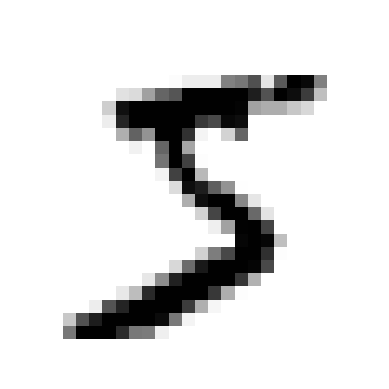

5


In [16]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28,28) # from 1d array to 2d array ..
    plt.imshow(image, cmap='binary') # using color with 2 only white and black 
    plt.axis("off") # showing grid axis 
some_digit = x[0]
plot_digit(some_digit)
plt.show()
print(y[0])


In [21]:
x_train,x_test= x[:60000],x[60000:]
print(x_train)
print(x_test)
print(x.dtype, x.min(), x.max())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
int64 0 255


In [ ]:
y_train, y_test = y[:60000], y[60000:]
ytrain_5 = (y_train == '5')
ytest_5 = (y_test == '5')
print(ytrain_5)

[ True False False ...  True False False]
0


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train,ytrain_5)
sgd_clf.predict([some_digit])



array([ True])

In [28]:
# measuring accuracy using cross-validation

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,x_train,ytrain_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [30]:
# using dummy classifier for accuracy

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(x_train,ytrain_5)
print(any(dummy_clf.predict(x_train)))

cross_val_score(dummy_clf,x_train,ytrain_5,cv=3,scoring="accuracy")

False


array([0.90965, 0.90965, 0.90965])

In [ ]:
# This demonstrates why accuracy is generally not the preferred performance measure
#for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are more frequent than others..
#A much better way to evaluate the performance of a classifier is to look at the confusion matrix (CM)

In [ ]:
# confusion matrix

